In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import community
import networkx as nx
import math
from sklearn.cluster import KMeans
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
dot = scipy.io.loadmat('data\XYZcoord1.mat')
dot = np.array(dot['XYZ1'])
weight = np.array(pd.read_csv('data\Edges.csv'))

In [2]:
def distance(a,b):
    x = (a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2
    x = math.sqrt(x)
    return x

In [3]:
X = np.empty(shape=[0, 3])
Y = np.empty(shape=[0, 3])
g = 0
for i in range(len(dot)):
    for j in range(i+1, len(dot)):
        d = distance(dot[i], dot[j])
        pair = [i+1, j+1, 1/d]
        g += 1
        Y = np.vstack((Y,pair))
    if g == len(dot):
    #確保最後一層有加到
        X = np.vstack((X,Y))
    if g % 50 == 0:
    #加速堆疊過程所需時間
        X = np.vstack((X,Y))
        Y = np.empty(shape=[0, 3])

In [4]:
a = nx.Graph()
for i in range(len(weight)):    
    c = ( str(int(weight[i,0])), str(int(weight[i,1])), weight[i,2] )
    a.add_weighted_edges_from([(c)])

In [5]:
b = nx.Graph()
for i in range(0, len(X)):    
    d = ( str(int(X[i,0])), str(int(X[i,1])), X[i,2] )
    b.add_weighted_edges_from([(d)])   

In [6]:
from community import best_partition
p = best_partition(a)
s = float(len(set(p.values())))
print("geo_community:", s)
m = community.modularity(p,a)
print("geo_modularity:", m)

p2 = best_partition(b)
size = float(len(set(p2.values())))
print("euc_community:", size)
mod = community.modularity(p2,b)
print("euc_modularity:", mod)

geo_community: 43.0
geo_modularity: 0.9373006097970175
euc_community: 5.0
euc_modularity: 0.18377971745346894


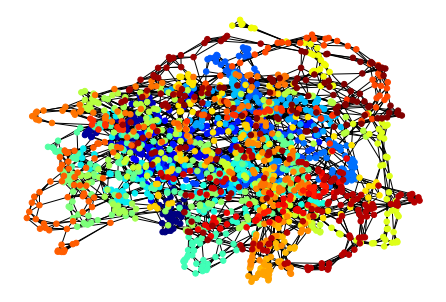

In [7]:
for com in set(p.values()) :
    members = list_nodes = [nodes for nodes in p.keys() if p[nodes] == com]
values = [p.get(node) for node in a.nodes()]
values = list(p.values())
nx.draw_spring(a, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)

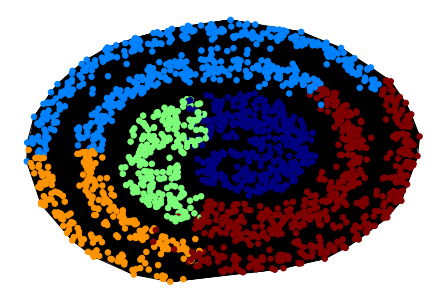

In [8]:
for com2 in set(p2.values()) :
    members2 = list_nodes2 = [nodes2 for nodes2 in p2.keys() if p2[nodes2] == com2]
values2 = [p2.get(node2) for node2 in b.nodes()]
values2 = list(p2.values())
nx.draw_spring(b, cmap = plt.get_cmap('jet'), node_color = values2, node_size = 30, with_labels = False)

In [9]:
label = np.zeros((len(dot),1))
for j in set(p.values()) :
    for i in range(len(dot)) :
        if p[str(i+1)] == j :            
            label[i] =  j
label = np.reshape(label, len(dot))      

print(label)
print("label.shape:", label.shape)

label2 = np.zeros((len(dot),1))
for j in set(p2.values()) :
    for i in range(len(dot)) :
        if p2[str(i+1)] == j :            
            label2[i] =  j
label2 = np.reshape(label2, len(dot))

print(label2)
print("label2.shape:", label2.shape)

[ 0.  1.  1. ... 39. 34. 34.]
label.shape: (2000,)
[0. 0. 0. ... 3. 3. 3.]
label2.shape: (2000,)


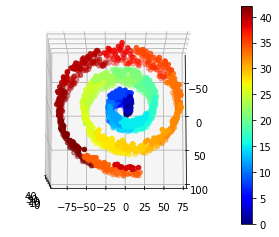

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = dot[:,0]
y = dot[:,1]
z = dot[:,2]
ax1=ax.scatter(x, y, z, c=label, cmap='jet')
ax.view_init(80, 0)
fig.colorbar(ax1)

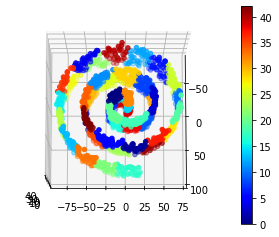

In [11]:
class_ = KMeans(n_clusters=int(len(set(p.values())))).fit_predict(dot)
fig = plt.figure()
ax = plt.axes(projection='3d')
x = dot[:,0]
y = dot[:,1]
z = dot[:,2]
ax1=ax.scatter(x, y, z, c=class_, cmap='jet')
ax.view_init(80, 0)
fig.colorbar(ax1)

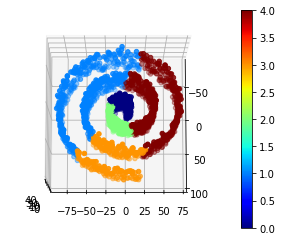

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = dot[:,0]
y = dot[:,1]
z = dot[:,2]
ax1=ax.scatter(x, y, z, c=label2, cmap='jet')
ax.view_init(80, 0)
fig.colorbar(ax1)

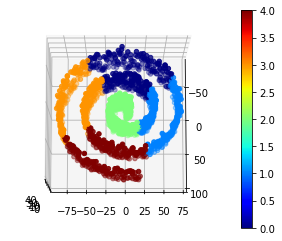

In [13]:
class_ = KMeans(n_clusters=int(len(set(p2.values())))).fit_predict(dot)
fig = plt.figure()
ax = plt.axes(projection='3d')
x = dot[:,0]
y = dot[:,1]
z = dot[:,2]
ax1=ax.scatter(x, y, z, c=class_, cmap='jet')
ax.view_init(80, 0)
fig.colorbar(ax1)